In [37]:
import pandas as pd 
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
df = pd.read_csv('data/test_geocoder.tsv')

In [30]:
pred_data = df[['id', 'event_title', 'summary', 'category', 'url']].copy()
news_id = []
for url in pred_data['url']:
    news_id.append(f'spnews_{str(url).split('=')[1]}')

pred_data['id'] = news_id
pred_data.rename(columns={'category': 'pred_category'}, inplace=True)
pred_data.drop(columns=['url'], inplace=True)
pred_data.head()

,id,event_title,summary,pred_category
0,spnews_101404,신의주온실종합농장 건설 마감단계,신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다. 군민건설...,경제/산업
1,spnews_101403,"북한, 나무 사름률 높이는 제품 소개",북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다. 이 제품은...,경제/산업
2,spnews_101402,개성시 식물방역소 및 돼지종축장 건설,북한 개성시에서 식물방역소와 돼지종축장이 새로 건설되었다. 개성시식물방역소 건설에 ...,경제/산업
3,spnews_101394,가을 추수로 인한 곡물 가격 하락,가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다. 쌀과 옥수수 등...,경제/산업
4,spnews_101392,어머니날 경축 행사,북한 각지에서 어머니날을 경축하며 김일성-김정일 동상에 꽃다발을 바쳤다. 공산주의어...,사회/문화/체육


In [31]:
label_data = pd.read_csv('data/spnews_final.csv')
filtered_labeled_data = label_data[label_data['id'].isin(news_id)][['id', 'category']]

In [35]:
test_data = pred_data.merge(filtered_labeled_data, on='id', how='left')

Accuracy: 0.96


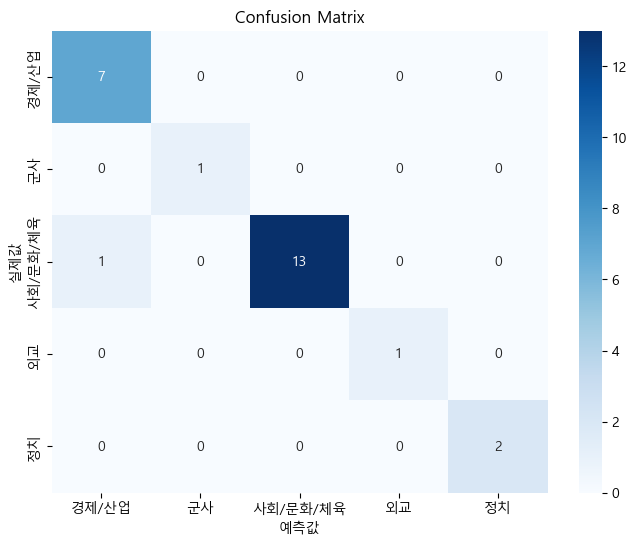

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 🔥 label 순서를 고정 (unique 순서 통일)
labels = sorted(list(set(test_data['category']) | set(test_data['pred_category'])))

accuracy = accuracy_score(test_data["category"], test_data["pred_category"])
cm = confusion_matrix(test_data["category"], test_data["pred_category"], labels=labels)

print(f'Accuracy: {accuracy}')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.show()

In [11]:
with open('pickle/s_news_cate_tfidf_xcombined_vec.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [4]:
df = pd.read_csv('data/test_region_parsing_result.tsv')
df

,id,summary,keywords,event_title,event_date,event_person,event_org,event_loc,url,category,title,publish_date
0,1,신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다. 군민건설...,"온실, 건설, 잔디, 나무, 공원",신의주온실종합농장 건설 마감단계,2025-11-17,NaN,NaN,평안북도 신의주시,https://www.spnews.co.kr/news/articleView.html...,NaN,"北, 신의주온실종합농장 건설장 지대정리·잔디심기 마감단계",2025-11-17
1,2,북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다. 이 제품은...,"나무, 사름률, 천연생물활성제, 제품, 효과","북한, 나무 사름률 높이는 제품 소개",2025-11-17,NaN,NaN,NaN,https://www.spnews.co.kr/news/articleView.html...,NaN,"北, 나무 사름률 높이는 제품은?",2025-11-17
2,3,북한 개성시에서 식물방역소와 돼지종축장이 새로 건설되었다. 개성시식물방역소 건설에 ...,"식물방역소, 돼지종축장, 건설, 개성시, 근로자",개성시 식물방역소 및 돼지종축장 건설,2025-11-17,NaN,"개성시식물방역소, 개성돼지종축장",개성시,https://www.spnews.co.kr/news/articleView.html...,NaN,"北 개성시, 식물방역소·돼지종축장 신축",2025-11-17
3,4,가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다. 쌀과 옥수수 등...,"곡물, 가격, 하락, 추수, 유류",가을 추수로 인한 곡물 가격 하락,2025-11-15,NaN,NaN,"강원도 원산시, 양강도 혜산시, 평양시, 황해북도 사리원시",https://www.spnews.co.kr/news/articleView.html...,NaN,"[北 물가] 가을 추수 영향, 곡물가 내림세",2025-11-17
4,5,북한 각지에서 어머니날을 경축하며 김일성-김정일 동상에 꽃다발을 바쳤다. 공산주의어...,"어머니날, 경축, 공연, 동상, 여성근로자",어머니날 경축 행사,2025-11-16,NaN,NaN,"강원도, 개성시, 나선시, 양강도, 평안남도, 평양시, 황해북도",https://www.spnews.co.kr/news/articleView.html...,NaN,북한 각지서 어머니날 경축... 김일성-김정일 동상 참배,2025-11-17
5,6,평안남도 원화농장에서 첫 모내기를 기념하여 결산분배가 진행되었다. 농장 일꾼들과 근...,"모내기, 결산분배, 원화농장, 농업, 평안남도",평안남도 원화농장에서 첫 모내기 결산분배 실시,2025-05-16,"리경철, 최영송","평안남도당위원회, 도농촌경리위원회",평안남도,https://www.spnews.co.kr/news/articleView.html...,NaN,"北, 첫 모내기 하는 평남 원화농장서 결산분배 실시",2025-11-17
6,7,북한 여자축구선수들이 2025 FIFA U-17 여자월드컵에서 우승하고 귀국했다. ...,"여자축구, U-17, 우승, 귀국, 네덜란드",2025 FIFA U-17 여자월드컵 우승 북한 선수단 귀국,2025-11-15,김일국,축구협회,평양시,https://www.spnews.co.kr/news/articleView.html...,NaN,2025 FIFA U-17 여자월드컵' 우승 북한 선수단 귀국,2025-11-17
7,8,양강도에서 올해 계획된 수천 세대의 농촌살림집 건설이 마무리되었다. 여러 군과 시에...,"양강도, 농촌살림집, 건설, 입사모임, 당원대대",양강도 농촌살림집 건설 마감,2025-11-17,NaN,"당원대대, 평양시당원대대",양강도 혜산시,https://www.spnews.co.kr/news/articleView.html...,NaN,"北 ""양강도, 올해 계획된 농촌살림집 건설 마감""",2025-11-17
8,9,"전지역에 가끔 구름이 많고, 평남과 황해도는 오후부터 차차 맑아질 것으로 예상된다....","날씨, 구름, 적설, 기온, 기상청",북한 전지역 날씨 예보,2025-11-17,NaN,기상청,"양강도, 평안도, 함경도",https://www.spnews.co.kr/news/articleView.html...,NaN,[오늘의 북한 날씨] 전지역 가끔 구름많음,2025-11-17
9,10,북한이 한미 해군 연합훈련 기간 동안 강원도 고성항에 두만급 호위함을 추가 배치했다...,"호위함, 한미 해군, 연합훈련, 고성항, 동해상","북한, 한미 해군 연합훈련 기간 호위함 추가 배치",2025-11-11,NaN,NaN,강원도,https://www.spnews.co.kr/news/articleView.html...,NaN,"北, 한미 해군 연합훈련 기간 강원도 고성항에 호위함 추가 배치",2025-11-16


In [10]:
print(str(df[df['id'] == 'spnews_101392'].url))

4    https://www.spnews.co.kr/news/articleView.html...
Name: url, dtype: object


In [12]:
df[df['id'] == 'spnews_101392']

,id,title,contents,source,section,author,publish_date,url,category,summary,keywords,event_title,event_date,event_person,event_org,event_loc,p_rice(won/kg),p_corn(won/kg),p_usd(won/usd),job_cost
4,spnews_101392,북한 각지서 어머니날 경축... 김일성-김정일 동상 참배,"북한 각지에서 어머니날(11월 16일)을 경축했다.\n노동신문은 17일 ""어머니날을...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 각지에서 어머니날을 경축하며 김일성-김정일 동상에 꽃다발을 바쳤다. 공산주의어...,"어머니날, 경축, 동상, 공연, 여성근로자",어머니날 경축 행사,2025-11-16,NaN,NaN,"평안남도, 황해북도, 강원도, 양강도, 나선시, 개성시",NaN,NaN,NaN,0.000316


In [3]:
df1 = pd.read_csv('data/spnews_final.csv')
df1 =  df1[df1['contents'].notnull() & df1['category'].notnull()]
df1.shape

(19141, 9)

In [4]:
df2 = pd.read_csv('data/summary_df_final.csv')
df2.shape

(19141, 12)

In [6]:
merged_df = df1.merge(df2, on='id')

In [9]:
merged_df.shape

(19141, 20)

In [11]:
merged_df.to_csv('data/full_df_final.csv', index=False)

In [21]:
summary_df = pd.read_csv('data/cached/cache_output.csv')
len(summary_df)

961

In [16]:
sum(summary_df.job_cost)

1.9660058999998153

In [5]:
article_df = pd.read_csv('data/spnews_ver2.csv')

In [14]:
merged_df = article_df.merge(summary_df, how='right', on='id')
merged_df.drop(columns=['job_cost'], inplace=True)

In [20]:
merged_df.to_excel('data/merged_summary.xlsx', index=False)
merged_df.to_csv('data/merged_summary.csv', index=False)

In [11]:
merged_df

,id,title,contents,source,section,author,publish_date,url,category,summary,keywords,event_title,event_date,event_person,event_org,event_loc,p_rice(won/kg),p_corn(won/kg),p_usd(won/usd),job_cost
0,spnews_101404,"北, 신의주온실종합농장 건설장 지대정리·잔디심기 마감단계",북한 평안북도 신의주온실종합농장 건설장에서 방대한 면적의 지대정리와 잔디심기가 마감...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다. 군민건설...,"['온실농장', '잔디심기', '지대정리', '건설', '자연공원']",신의주온실종합농장 건설 마감단계,2025-11-17,[],[],['평안북도 신의주'],NaN,NaN,NaN,0.000263
1,spnews_101403,"北, 나무 사름률 높이는 제품은?",북한이 나무의 사름률을 보장에 효과적인 과학기술제품으로 천연생물활성제 등이 있다고 ...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다. 이 제품은...,"['나무', '사름률', '천연생물활성제', '제품', '효과']","북한, 나무 사름률 높이는 제품 소개",2025-11-17,[],[],[],NaN,NaN,NaN,0.000269
2,spnews_101402,"北 개성시, 식물방역소·돼지종축장 신축","북한 개성시에서 식물방역소와 돼지종축장 새로 건설했다.\n노동신문은 17일 ""개성시...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 개성시에서 식물방역소와 돼지종축장이 새로 건설되었다. 개성시식물방역소는 여러 ...,"['식물방역소', '돼지종축장', '건설', '개성시', '농업']",개성시 식물방역소 및 돼지종축장 건설,2025-11-17,[],"['개성시식물방역소', '시남새온실', '시유기질복합비료공장']",['개성시'],NaN,NaN,NaN,0.000272
3,spnews_101394,"[北 물가] 가을 추수 영향, 곡물가 내림세",북한지역에서 가을 추수가 마무리 되면서 쌀과 옥수수 등 곡물류 가격이 내림세로 돌아...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다. 쌀과 옥수수 가...,"['곡물', '가격', '하락', '추수', '유류']",가을 추수로 곡물 가격 하락,2025-11-15,[],[],['평양시'],19850.0,4500.0,34600.0,0.000312
4,spnews_101392,북한 각지서 어머니날 경축... 김일성-김정일 동상 참배,"북한 각지에서 어머니날(11월 16일)을 경축했다.\n노동신문은 17일 ""어머니날을...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 각지에서 어머니날을 경축하며 김일성-김정일 동상에 꽃다발을 바쳤다. 공산주의어...,"['어머니날', '김일성', '김정일', '동상', '공연']",어머니날 경축 행사,2025-11-16,[],[],['평양시'],NaN,NaN,NaN,0.000236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6903,spnews_63911,"[北 한컷] 토끼 기르기 ""군중적으로 전개""","북한 노동당 기관지 노동신문은 7일 ""평안북도에서 당의 축산정책을 받들고 토끼 기르...",spnews,북한N,김원준 기자,2023-04-07,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한에서 평안북도에서 토끼 기르기를 군중적으로 전개하고 있다. 당의 축산정책을 받들...,"['토끼', '축산정책', '군중적', '생산', '단백질']",평안북도에서 토끼 기르기 군중적으로 전개,2023-04-07,[],[],['평안북도'],NaN,NaN,NaN,0.000242
6904,spnews_63903,"북한, 핀란드 NATO 가입 비난...""후안무치한 행태""",북한이 핀란드가 나토(NATO·북대서양조약기구)에 가입한데 대해 비난했다.\n북한은...,spnews,북한N,안윤석 대기자,2023-04-07,https://www.spnews.co.kr/news/articleView.html...,외교,북한이 핀란드의 NATO 가입을 비난했다. 북한은 이를 '후안무치한 행태'로 묘사하...,"['핀란드', 'NATO', '러시아', '군사', '미국']","북한, 핀란드 NATO 가입 비난",2023-04-07,['김유철'],[],[],NaN,NaN,NaN,0.000232
6905,spnews_63895,"북한, '전국대학 2022년 교육총화회의'...""과학연구기지 중심돼야"" 독려",북한이 지난달 '전국대학 2022년 교육총화회의'를 열고 대학이 과학연구기지의 중심...,spnews,북한N,안윤석 대기자,2023-04-07,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한이 '전국대학 2022년 교육총화회의'를 열고 대학이 과학연구기지의 중심이 되어...,"['교육', '과학연구', '대학', '정책', '회의']",전국대학 2022년 교육총화회의 개최,2023-03-07,[],['교육부'],['평양시'],NaN,NaN,NaN,0.000303
6906,spnews_63893,"北, '한미군사연습' 계기 내부 결속 강화...'복수결의 모임' 개최",북한이 한미군사연습을 계기로 연일 반미·대남 비난 수위를 높이면서 내부결속을 다지고...,spnews,북한N,안윤석 대기자,2023-04-07,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한이 한미군사연습을 계기로 반미·대남 비난을 강화하며 내부 결속을 다지고 있다. ...,"['한미군사연습', '내부결속', '반미', '복수결의모임', '신천박물관']","북한, 한미군사연습 계기로 내부 결속 강화",2023-04-06,['박인철'],['조선직업총동맹'],['신천군'],NaN,NaN,NaN,0.000301


In [22]:
merged_df[merged_df.id == 'spnews_101394']

,id,title,contents,source,section,author,publish_date,url,category,summary,keywords,event_title,event_date,event_person,event_org,event_loc,p_rice(won/kg),p_corn(won/kg),p_usd(won/usd)
3,spnews_101394,"[北 물가] 가을 추수 영향, 곡물가 내림세",북한지역에서 가을 추수가 마무리 되면서 쌀과 옥수수 등 곡물류 가격이 내림세로 돌아...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다. 쌀과 옥수수 가...,"['곡물', '가격', '하락', '추수', '유류']",가을 추수로 곡물 가격 하락,2025-11-15,[],[],['평양시'],19850.0,4500.0,34600.0


In [24]:
df = pd.read_csv('data/spnews_final.csv')
df.head(3)

,id,title,contents,source,section,author,publish_date,url,category
0,spnews_101404,"北, 신의주온실종합농장 건설장 지대정리·잔디심기 마감단계",북한 평안북도 신의주온실종합농장 건설장에서 방대한 면적의 지대정리와 잔디심기가 마감...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업
1,spnews_101403,"北, 나무 사름률 높이는 제품은?",북한이 나무의 사름률을 보장에 효과적인 과학기술제품으로 천연생물활성제 등이 있다고 ...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업
2,spnews_101402,"北 개성시, 식물방역소·돼지종축장 신축","북한 개성시에서 식물방역소와 돼지종축장 새로 건설했다.\n노동신문은 17일 ""개성시...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육


In [33]:
df[df.contents]

,id,title,contents,source,section,author,publish_date,url,category
78,spnews_101077,"[오늘의 북한 날씨] 평안도·황해도 구름많음, 함경도 대체로 흐림","[기상청 발표 11월 7일(금) 북한 날씨]\n□ 평안도·황해도 구름많음, 함경도 ...",spnews,북한N,SPN 서울평양뉴스,2025-11-07,https://www.spnews.co.kr/news/articleView.html...,NaN
178,spnews_100515,"北 미사일총국 ""극초음속비행체 시험발사 성공""...김정은 참관 안해",북한 미사일총국이 22일 중요무기체계의 시험을 성공적으로 진행했다고 밝혔다.\n조선...,spnews,북한N,SPN 서울평양뉴스,2025-10-23,https://www.spnews.co.kr/news/articleView.html...,NaN
284,spnews_100091,NKDB '2025 북한인권·북한종교자유백서 발간 세미나',NaN,spnews,북한N,안윤석 대기자,2025-10-10,https://www.spnews.co.kr/news/articleView.html...,군사
708,spnews_97920,"중·러 北대사관, 항일전쟁·반파시스트전쟁 승리 80주년 공동 기념",북한 주재 러시아 대사관과 중국 대사관이 전승절 80주년과 항일전쟁 승리 80주년을...,spnews,북한N,유영목 기자,2025-08-03,https://www.spnews.co.kr/news/articleView.html...,NaN
784,spnews_97452,"北 건설단위, 화력발전소 등 주요 산업 건설 추진","북한 건설단위에서 주요 산업대상 건설을 추진하고있다.\n조선중앙통신은 21일 ""청진...",spnews,북한N,SPN 서울평양뉴스,2025-07-21,https://www.spnews.co.kr/news/articleView.html...,NaN
...,...,...,...,...,...,...,...,...,...
19342,spnews_200,"대북매체, ""북 김원홍 보위상, 군총정치국 조직부국장으로 전보"" 주장",NaN,spnews,북한N,안윤석 대기자,2017-05-01,https://www.spnews.co.kr/news/articleView.html...,정치
19373,spnews_78,北 풍계리 핵실험장 '밀봉' 수준…핵실험 증거 수집 어려워,NaN,spnews,북한N,안윤석 대기자,2017-04-22,https://www.spnews.co.kr/news/articleView.html...,정치
19374,spnews_53,"英 정부, 6년간 북한에 공적개발원조로 56억원 제공",NaN,spnews,북한N,안윤석 대기자,2017-04-19,https://www.spnews.co.kr/news/articleView.html...,경제/산업
19375,spnews_52,"중국행 북한 선박 현저히 줄어...'석탄 금수' 영향인 듯,",NaN,spnews,북한N,안윤석 대기자,2017-04-19,https://www.spnews.co.kr/news/articleView.html...,경제/산업


In [34]:
merged_df[["id", "summary", "keywords"]]

,id,title,contents,source,section,author,publish_date,url,category,summary,keywords,event_title,event_date,event_person,event_org,event_loc,p_rice(won/kg),p_corn(won/kg),p_usd(won/usd)
0,spnews_101404,"北, 신의주온실종합농장 건설장 지대정리·잔디심기 마감단계",북한 평안북도 신의주온실종합농장 건설장에서 방대한 면적의 지대정리와 잔디심기가 마감...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다. 군민건설...,"['온실농장', '잔디심기', '지대정리', '건설', '자연공원']",신의주온실종합농장 건설 마감단계,2025-11-17,[],[],['평안북도 신의주'],NaN,NaN,NaN
1,spnews_101403,"北, 나무 사름률 높이는 제품은?",북한이 나무의 사름률을 보장에 효과적인 과학기술제품으로 천연생물활성제 등이 있다고 ...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다. 이 제품은...,"['나무', '사름률', '천연생물활성제', '제품', '효과']","북한, 나무 사름률 높이는 제품 소개",2025-11-17,[],[],[],NaN,NaN,NaN
2,spnews_101402,"北 개성시, 식물방역소·돼지종축장 신축","북한 개성시에서 식물방역소와 돼지종축장 새로 건설했다.\n노동신문은 17일 ""개성시...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 개성시에서 식물방역소와 돼지종축장이 새로 건설되었다. 개성시식물방역소는 여러 ...,"['식물방역소', '돼지종축장', '건설', '개성시', '농업']",개성시 식물방역소 및 돼지종축장 건설,2025-11-17,[],"['개성시식물방역소', '시남새온실', '시유기질복합비료공장']",['개성시'],NaN,NaN,NaN
3,spnews_101394,"[北 물가] 가을 추수 영향, 곡물가 내림세",북한지역에서 가을 추수가 마무리 되면서 쌀과 옥수수 등 곡물류 가격이 내림세로 돌아...,spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,경제/산업,가을 추수가 마무리되면서 북한의 곡물 가격이 하락세를 보이고 있다. 쌀과 옥수수 가...,"['곡물', '가격', '하락', '추수', '유류']",가을 추수로 곡물 가격 하락,2025-11-15,[],[],['평양시'],19850.0,4500.0,34600.0
4,spnews_101392,북한 각지서 어머니날 경축... 김일성-김정일 동상 참배,"북한 각지에서 어머니날(11월 16일)을 경축했다.\n노동신문은 17일 ""어머니날을...",spnews,북한N,안윤석 대기자,2025-11-17,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한 각지에서 어머니날을 경축하며 김일성-김정일 동상에 꽃다발을 바쳤다. 공산주의어...,"['어머니날', '김일성', '김정일', '동상', '공연']",어머니날 경축 행사,2025-11-16,[],[],['평양시'],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6903,spnews_63911,"[北 한컷] 토끼 기르기 ""군중적으로 전개""","북한 노동당 기관지 노동신문은 7일 ""평안북도에서 당의 축산정책을 받들고 토끼 기르...",spnews,북한N,김원준 기자,2023-04-07,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한에서 평안북도에서 토끼 기르기를 군중적으로 전개하고 있다. 당의 축산정책을 받들...,"['토끼', '축산정책', '군중적', '생산', '단백질']",평안북도에서 토끼 기르기 군중적으로 전개,2023-04-07,[],[],['평안북도'],NaN,NaN,NaN
6904,spnews_63903,"북한, 핀란드 NATO 가입 비난...""후안무치한 행태""",북한이 핀란드가 나토(NATO·북대서양조약기구)에 가입한데 대해 비난했다.\n북한은...,spnews,북한N,안윤석 대기자,2023-04-07,https://www.spnews.co.kr/news/articleView.html...,외교,북한이 핀란드의 NATO 가입을 비난했다. 북한은 이를 '후안무치한 행태'로 묘사하...,"['핀란드', 'NATO', '러시아', '군사', '미국']","북한, 핀란드 NATO 가입 비난",2023-04-07,['김유철'],[],[],NaN,NaN,NaN
6905,spnews_63895,"북한, '전국대학 2022년 교육총화회의'...""과학연구기지 중심돼야"" 독려",북한이 지난달 '전국대학 2022년 교육총화회의'를 열고 대학이 과학연구기지의 중심...,spnews,북한N,안윤석 대기자,2023-04-07,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한이 '전국대학 2022년 교육총화회의'를 열고 대학이 과학연구기지의 중심이 되어...,"['교육', '과학연구', '대학', '정책', '회의']",전국대학 2022년 교육총화회의 개최,2023-03-07,[],['교육부'],['평양시'],NaN,NaN,NaN
6906,spnews_63893,"北, '한미군사연습' 계기 내부 결속 강화...'복수결의 모임' 개최",북한이 한미군사연습을 계기로 연일 반미·대남 비난 수위를 높이면서 내부결속을 다지고...,spnews,북한N,안윤석 대기자,2023-04-07,https://www.spnews.co.kr/news/articleView.html...,사회/문화/체육,북한이 한미군사연습을 계기로 반미·대남 비난을 강화하며 내부 결속을 다지고 있다. ...,"['한미군사연습', '내부결속', '반미', '복수결의모임', '신천박물관']","북한, 한미군사연습 계기로 내부 결속 강화",2023-04-06,['박인철'],['조선직업총동맹'],['신천군'],NaN,NaN,NaN


In [35]:
cache_data = pd.read_csv('data/cached/cache_output.csv')
cache_data.head(2)

,id,summary,keywords,event_title,event_date,event_person,event_org,event_loc,p_rice(won/kg),p_corn(won/kg),p_usd(won/usd),job_cost
0,spnews_101404,신의주온실종합농장 건설장에서 지대정리와 잔디심기가 마감단계에 이르고 있다. 군민건설...,"['온실농장', '잔디심기', '지대정리', '건설', '자연공원']",신의주온실종합농장 건설 마감단계,2025-11-17,[],[],['평안북도 신의주'],NaN,NaN,NaN,0.000263
1,spnews_101403,북한이 나무의 사름률을 높이는 과학기술제품으로 천연생물활성제를 소개했다. 이 제품은...,"['나무', '사름률', '천연생물활성제', '제품', '효과']","북한, 나무 사름률 높이는 제품 소개",2025-11-17,[],[],[],NaN,NaN,NaN,0.000269


In [37]:
merged_df.summary.isna().sum()

np.int64(0)

In [38]:
merged_df.keywords.isna().sum()

np.int64(0)

In [45]:
columns = list(cache_data.columns[:-1])

In [48]:
cache_output = merged_df[columns]
cache_output.to_csv('data/cached/cache_output.csv', index=False)

In [50]:
test_input = pd.read_csv('data/spnews_ver2.csv')
test_input = test_input[test_input.contents.notnull() & test_input.category.notnull()]

In [52]:
test_input[test_input.id == 'spnews_97892']

,id,title,contents,source,section,author,publish_date,url,category
713,spnews_97892,"김정은, 위화도 온실농장·제방공사장 시찰...""철도역, 화물역으로""","북한 김정은 총비서가 1일 위화도온실종합농장 건설장과 신의주시, 의주군의 섬지구 영...",spnews,북한N,안윤석 대기자,2025-08-02,https://www.spnews.co.kr/news/articleView.html...,정치


In [ ]:
test_input